In [ ]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns


In [ ]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
consumer_key='hZb1UDr1PrjmNZOymldirg9zr' 
consumer_secret='K1qBAPAUjPG8h0qmlPehV9sO0dHT2raWPtdqatJauTZHw1jxt7'
access_token='1203193983196897280-hoqU2iEkoZVBJNLHH28ymGsTMoKE4c'
access_token_secret='OuyCBohL6i4vDazhQrNWpdWZy5c1cReX9N2pmGzDJWC9O'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)

In [ ]:
# cursor = tweepy.Cursor(api.user_timeline,id='taylorswift13',tweet_mode="extended").items(1)

In [ ]:
# cursor = tweepy.Cursor(api.search,q="mongodb",tweet_mode="extended").items(1)

In [ ]:
# for i in cursor:
#   print(i.full_text)

RT @byLilyV: #FEATURED #COURSES

Angular &amp; NodeJS - The MEAN Stack Guide [2021 Edition]

Learn how to connect your #Angular #Frontend to a…


In [ ]:
 number_of_tweets=200
 tweets=[]
 likes=[]
time=[]

for i in tweepy.Cursor(api.user_timeline,id='taylorswift13',tweet_mode="extended").items(number_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [ ]:
# tweets

['I got a list of names and yours is in... glittery gel pen with hearts drawn around it 😇 @Maisie_Williams @wiffygriffy @Olivia_Rodrigo https://t.co/EgT50dBa7n',
 'We meet up every Tuesday night for dinner and a glass of wine 🍷 https://t.co/HT8yj2oJL7',
 'Spinning in my highest heels, luv \n#BRITs https://t.co/1TMBoCZ6Do',
 'CONGRATS @lanawilson 😇😇😇 !!! And a million hugs to the fans who made this happen! https://t.co/YMRWLZTWaa',
 'Been in the studio all day recording the next one - it’s really so amazing what you all have done here. 🙏🙏🙏 https://t.co/rxa5njMn0z',
 'Home is where the 💛 is \nbut God I 💛 the UK!!! https://t.co/OiPahpxcLK',
 'I wanted to say thank you to you so today I will be addressing a very pressing issue. 🐈🐈\u200d⬛❓ https://t.co/kBUybYoV2W',
 'WELL WELL WELL you all really went out and left my greatest expectations in shambles this week.😆 Word on the street is you made Fearless (my version) the biggest country album 1st week of the last 6 years &amp; the top release 

In [ ]:
df=pd.DataFrame({'tweets':tweets,'likes':likes,'time':time})

In [ ]:
df = df[~df.tweets.str.contains("RT")]

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df

,tweets,likes,time
0,I got a list of names and yours is in... glitt...,305934,2021-05-12 20:27:39
1,We meet up every Tuesday night for dinner and ...,373112,2021-05-11 23:19:22
2,"Spinning in my highest heels, luv \n#BRITs htt...",613165,2021-05-11 19:22:20
3,CONGRATS @lanawilson 😇😇😇 !!! And a million hug...,186964,2021-04-19 21:04:00
4,Been in the studio all day recording the next ...,390346,2021-04-18 20:33:12
...,...,...,...
195,My conversations with my mom have always been ...,179068,2020-05-11 01:58:55
196,Excited to announce the City of Lover Concert!...,145967,2020-05-08 12:47:13
197,I’m absolutely devastated and horrified by the...,273560,2020-05-07 21:25:42
198,🍷 🐍 biiig isolation 🐍 🍷 https://t.co/MJbhD8Bau1,407466,2020-05-07 17:27:50


In [ ]:
mostlike = df.loc[df.likes.nlargest(9).index]

In [ ]:
mostlike

,tweets,likes,time
179,After stoking the fires of white supremacy and...,2130417,2020-05-29 15:33:41
34,Hey guys so who’s gonna tell 18 year old me th...,914584,2021-02-14 16:19:47
159,Surprise 🤗 Tonight at midnight I’ll be releasi...,800124,2020-07-23 12:01:12
130,Trump’s calculated dismantling of USPS proves ...,749082,2020-08-15 17:20:37
38,I’m thrilled to tell you that my new version o...,723429,2021-02-11 13:17:25
28,"Hey Ginny &amp; Georgia, 2010 called and it wa...",722795,2021-03-01 14:55:16
84,I’m elated to tell you that my 9th studio albu...,693141,2020-12-10 13:04:22
45,"bye 2020, it’s been weird. https://t.co/vQoZVS...",663562,2020-12-31 15:32:18
2,"Spinning in my highest heels, luv \n#BRITs htt...",613165,2021-05-11 19:22:20


In [ ]:
#splitting the list of sentences into words
list_of_sentences = [sentence for sentence in df.tweets]

lines=[]
for sentence in list_of_sentences:
  words = sentence.split()
  for w in words:
    lines.append(w)

In [ ]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [ ]:
 #This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['i',
 'got',
 'a',
 'list',
 'of',
 'name',
 'and',
 'your',
 'is',
 'in',
 'glitteri',
 'gel',
 'pen',
 'with',
 'heart',
 'drawn',
 'around',
 'it',
 'maisiewilliam',
 'wiffygriffi',
 'oliviarodrigo',
 'httpstcoegt50dba7n',
 'we',
 'meet',
 'up',
 'everi',
 'tuesday',
 'night',
 'for',
 'dinner',
 'and',
 'a',
 'glass',
 'of',
 'wine',
 'httpstcoht8yj2ojl7',
 'spin',
 'in',
 'my',
 'highest',
 'heel',
 'luv',
 'brit',
 'httpstco1tmbocz6do',
 'congrat',
 'lanawilson',
 'and',
 'a',
 'million',
 'hug',
 'to',
 'the',
 'fan',
 'who',
 'made',
 'this',
 'happen',
 'httpstcoymrwlztwaa',
 'been',
 'in',
 'the',
 'studio',
 'all',
 'day',
 'record',
 'the',
 'next',
 'one',
 'it',
 'realli',
 'so',
 'amaz',
 'what',
 'you',
 'all',
 'have',
 'done',
 'here',
 'httpstcorxa5njmn0z',
 'home',
 'is',
 'where',
 'the',
 'is',
 'but',
 'god',
 'i',
 'the',
 'uk',
 'httpstcooipahpxclk',
 'i',
 'want',
 'to',
 'say',
 'thank',
 'you',
 'to',
 'you',
 'so',
 'today',
 'i',
 'will',
 'be',
 'address

In [ ]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['got',
 'list',
 'glitteri',
 'gel',
 'pen',
 'heart',
 'drawn',
 'maisiewilliam',
 'wiffygriffi',
 'oliviarodrigo',
 'httpstcoegt50dba7n',
 'meet',
 'everi',
 'tuesday',
 'night',
 'dinner',
 'glass',
 'wine',
 'httpstcoht8yj2ojl7',
 'spin',
 'highest',
 'heel',
 'luv',
 'brit',
 'httpstco1tmbocz6do',
 'congrat',
 'lanawilson',
 'million',
 'hug',
 'fan',
 'happen',
 'httpstcoymrwlztwaa',
 'studio',
 'day',
 'record',
 'realli',
 'amaz',
 'httpstcorxa5njmn0z',
 'home',
 'god',
 'uk',
 'httpstcooipahpxclk',
 'want',
 'thank',
 'today',
 'address',
 'veri',
 'press',
 'issu',
 'httpstcokbuybyov2w',
 'realli',
 'went',
 'left',
 'greatest',
 'expect',
 'shambl',
 'week',
 'word',
 'street',
 'fearless',
 'version',
 'biggest',
 'countri',
 'album',
 '1st',
 'week',
 '6',
 'year',
 'amp',
 'releas',
 '2021',
 'far',
 'honest',
 'lucki',
 'said',
 'hey',
 'stephen',
 'day',
 'stephenathom',
 'colbertlateshow',
 'httpstcoafm0o08mdd',
 'perfect',
 'fine',
 'amazonmus',
 'httpstcobutdyt52rx'

In [ ]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


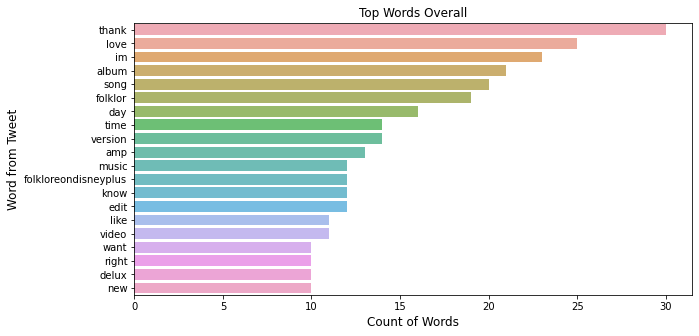

In [ ]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [ ]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [ ]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


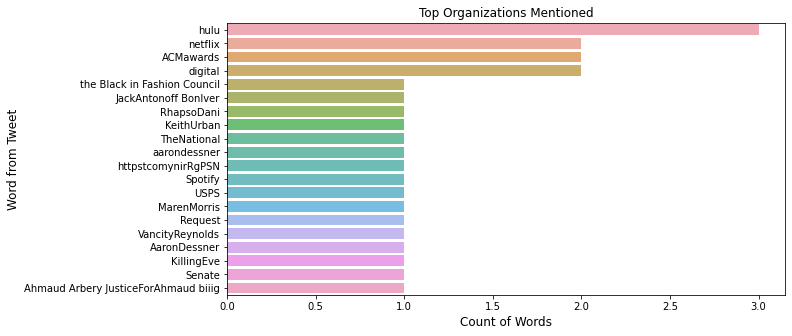

In [ ]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [ ]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


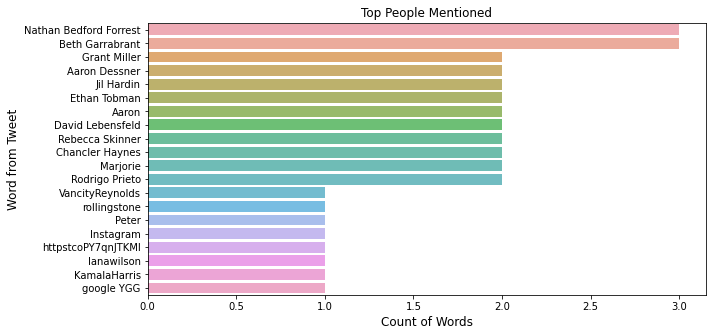

In [ ]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()